# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | When dropping off my luggag...
1,✅ Trip Verified | If you can’t fly First Class...
2,Not Verified | Singapore to Heathrow. Busine...
3,Not Verified | I reported my damaged/ruined ...
4,"Not Verified | On March 1st, I flew from Ber..."


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_reviews = pd.read_csv("data\BA_reviews.csv")

In [7]:
df_reviews.shape

(3826, 2)

In [8]:
df_reviews.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [9]:
df_reviews.head(15)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | When dropping off my luggag...
1,1,✅ Trip Verified | If you can’t fly First Class...
2,2,Not Verified | Singapore to Heathrow. Busine...
3,3,Not Verified | I reported my damaged/ruined ...
4,4,"Not Verified | On March 1st, I flew from Ber..."
5,5,Not Verified | The WORST customer experience! ...
6,6,Not Verified | Had to cancel my flight month...
7,7,✅ Trip Verified | Flight cancelled with no rea...
8,8,✅ Trip Verified | This is a route I fly regula...
9,9,✅ Trip Verified | While BA may have made some...


In [10]:
df_reviews.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
def process_reviews(df):
    # Split the 'reviews' column on '|' and create new columns
    df[['status','reviews_text']] = df['reviews'].str.split('|', expand=True)
    
    # Fill 'reviews2' with original 'reviews' where 'reviews2' is NaN
    df['reviews_text'] = df['reviews_text'].fillna(df['reviews'])
    
    return df

In [12]:
df_processed = process_reviews(df_reviews)

In [13]:
df_processed

,reviews,status,reviews_text
0,✅ Trip Verified | When dropping off my luggag...,✅ Trip Verified,When dropping off my luggage at the luggage ...
1,✅ Trip Verified | If you can’t fly First Class...,✅ Trip Verified,If you can’t fly First Class don’t fly Britis...
2,Not Verified | Singapore to Heathrow. Busine...,Not Verified,Singapore to Heathrow. Business class on an...
3,Not Verified | I reported my damaged/ruined ...,Not Verified,I reported my damaged/ruined suitcase 5 wee...
4,"Not Verified | On March 1st, I flew from Ber...",Not Verified,"On March 1st, I flew from Berlin to São Pau..."
...,...,...,...
3821,Flew LHR - VIE return operated by bmi but BA a...,Flew LHR - VIE return operated by bmi but BA a...,Flew LHR - VIE return operated by bmi but BA a...
3822,LHR to HAM. Purser addresses all club passenge...,LHR to HAM. Purser addresses all club passenge...,LHR to HAM. Purser addresses all club passenge...
3823,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...
3824,London City-New York JFK via Shannon on A318 b...,London City-New York JFK via Shannon on A318 b...,London City-New York JFK via Shannon on A318 b...


In [14]:
df_processed.drop(columns=['status'], inplace=True)

In [15]:
df_processed

,reviews,reviews_text
0,✅ Trip Verified | When dropping off my luggag...,When dropping off my luggage at the luggage ...
1,✅ Trip Verified | If you can’t fly First Class...,If you can’t fly First Class don’t fly Britis...
2,Not Verified | Singapore to Heathrow. Busine...,Singapore to Heathrow. Business class on an...
3,Not Verified | I reported my damaged/ruined ...,I reported my damaged/ruined suitcase 5 wee...
4,"Not Verified | On March 1st, I flew from Ber...","On March 1st, I flew from Berlin to São Pau..."
...,...,...
3821,Flew LHR - VIE return operated by bmi but BA a...,Flew LHR - VIE return operated by bmi but BA a...
3822,LHR to HAM. Purser addresses all club passenge...,LHR to HAM. Purser addresses all club passenge...
3823,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...
3824,London City-New York JFK via Shannon on A318 b...,London City-New York JFK via Shannon on A318 b...


## Data Cleaning

In [16]:
import string
import re
import numpy as np
from nltk.corpus import stopwords

def clean_text(text):
    # check if text is NaN
    if isinstance(text, float) and np.isnan(text):
        return ""
    
    # convert text to lowercase
    text = str(text).lower()
    
    # Remove single quotes
    text = re.sub(r'[^a-z\s]', '', text)
    
    # remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    text = [word for word in text if word not in stopwords.words('english')]
    
    # remove empty tokens
    text = [word for word in text if len(word) > 0]
    
    # join all
    text = " ".join(text)
    return text

# Apply clean text data
df_processed["reviews_clean"] = df_processed["reviews_text"].apply(clean_text)
df_processed.drop(columns=['reviews_text'], inplace=True)
df_processed

,reviews,reviews_clean
0,✅ Trip Verified | When dropping off my luggag...,dropping luggage luggage drop toulouse airport...
1,✅ Trip Verified | If you can’t fly First Class...,cant fly first class dont fly british airways ...
2,Not Verified | Singapore to Heathrow. Busine...,singapore heathrow business class premium econ...
3,Not Verified | I reported my damaged/ruined ...,reported damagedruined suitcase weeks ago im s...
4,"Not Verified | On March 1st, I flew from Ber...",on march st flew berlin paulo ba encountere...
...,...,...
3821,Flew LHR - VIE return operated by bmi but BA a...,flew lhr vie return operated bmi ba aircraft a...
3822,LHR to HAM. Purser addresses all club passenge...,lhr ham purser addresses club passengers name ...
3823,My son who had worked for British Airways urge...,son worked british airways urged fly british a...
3824,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon really nic...


## Topic Modelling
### Latent Dirichlet Allocation (LDA)

In [17]:
import gensim.corpora as corpora
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Tokenize each review in the 'reviews_clean' column
texts = [word_tokenize(reviews) for reviews in df_processed['reviews_clean']]

# Create Dictionary
id2word = corpora.Dictionary(texts)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=5, 
                     random_state=100, 
                     update_every=1, 
                     chunksize=10, 
                     passes=10, 
                     alpha='auto', 
                     per_word_topics=True)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.027*"british" + 0.023*"airways" + 0.016*"airport" + 0.016*"delayed" + 0.014*"hours" + 0.014*"luggage" + 0.014*"never" + 0.013*"put" + 0.012*"via" + 0.012*"london"

Topic: 1 
Words: 0.036*"seat" + 0.036*"good" + 0.029*"food" + 0.027*"seats" + 0.020*"class" + 0.017*"business" + 0.016*"economy" + 0.015*"lounge" + 0.015*"club" + 0.014*"first"

Topic: 2 
Words: 0.063*"flight" + 0.049*"ba" + 0.021*"time" + 0.015*"return" + 0.014*"one" + 0.013*"back" + 0.012*"flights" + 0.012*"would" + 0.011*"get" + 0.010*"plane"

Topic: 3 
Words: 0.036*"crew" + 0.024*"cabin" + 0.018*"service" + 0.014*"boarding" + 0.013*"excellent" + 0.011*"food" + 0.010*"drinks" + 0.010*"well" + 0.010*"nice" + 0.010*"meal"

Topic: 4 
Words: 0.038*"us" + 0.034*"told" + 0.019*"th" + 0.019*"booked" + 0.015*"asked" + 0.014*"help" + 0.013*"customer" + 0.011*"june" + 0.010*"called" + 0.010*"call"



## Sentiment Analysis

### VADER (Valence Aware Dictionary and Entiment Reasoner)

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
#nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(review):
    return sid.polarity_scores(review)

# Apply the function to the reviews
df_processed['sentiment_scores'] = df_processed['reviews_clean'].apply(get_sentiment_scores)

# Extract compound score and classify sentiment
df_processed['compound'] = df_processed['sentiment_scores'].apply(lambda x: x['compound'])
df_processed['sentiment'] = df_processed['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the df_processedframe
df_processed[['reviews_clean', 'compound', 'sentiment']]

,reviews_clean,compound,sentiment
0,dropping luggage luggage drop toulouse airport...,0.3274,positive
1,cant fly first class dont fly british airways ...,-0.9678,negative
2,singapore heathrow business class premium econ...,-0.2732,negative
3,reported damagedruined suitcase weeks ago im s...,-0.1779,negative
4,on march st flew berlin paulo ba encountere...,-0.9167,negative
...,...,...,...
3821,flew lhr vie return operated bmi ba aircraft a...,0.9531,positive
3822,lhr ham purser addresses club passengers name ...,0.7650,positive
3823,son worked british airways urged fly british a...,0.7003,positive
3824,london citynew york jfk via shannon really nic...,0.8070,positive


## Data Visualization

### 1. Sentiment Analysis

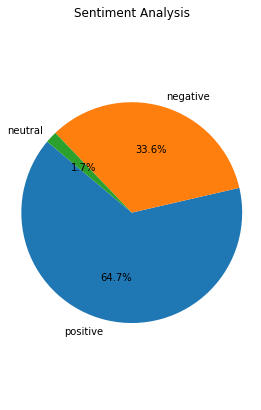

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment_counts = df_processed['sentiment'].value_counts()
sizes = sentiment_counts.values
explode = (0, 0, 0)  
label = sentiment_counts.index
angel = 140

plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title('Sentiment Analysis')
plt.pie(sizes, 
        labels = label,
        explode = explode, 
        autopct='%1.1f%%', 
        shadow=False,
        startangle=angel)
plt.axis('equal')
plt.show()

### 2. Word Cloud

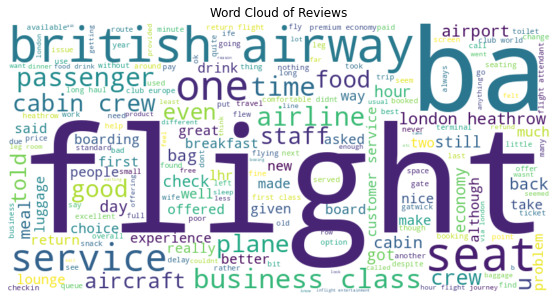

In [20]:
from wordcloud import WordCloud
def show_wordcloud(data):
    # Combine all reviews into a single string
    text = ' '.join(df_processed['reviews_clean'])
    
    # Create and configure the word cloud
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          background_color='white',
                          colormap='viridis').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title('Word Cloud of Reviews')
    plt.show()
show_wordcloud(df_processed['reviews_clean'])

In [21]:
df_processed.shape

(3826, 5)

In [22]:
sentiment_counts

positive    2476
negative    1284
neutral       66
Name: sentiment, dtype: int64